In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DELL\Desktop\MINOR PROJECT\ARP Poison,flood attack Dataset.csv")
df

,switch_id,in_port,outport,src_mac_addr(eth),src_mac_addr(arp),dst_mac_addr(eth),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
0,5,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1707,0,0,0.0,306446,0
1,2,3,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1708,0,0,0.0,306446,0
2,4,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1709,0,0,0.0,306446,0
3,3,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1710,0,0,0.0,306446,0
4,1,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1711,0,0,0.0,306446,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133995,2,1,4294967291,52:a8:8f:d6:f1:c5,f1:c7:f5:b5:82:57,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,20.43.47.187,10.0.0.2,1,96539,0,100,0.0,1028649,2
133996,11,4,4294967291,53:aa:b3:59:5b:9d,3e:22:e6:34:53:79,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,83.60.24.35,10.0.0.2,1,96540,0,100,0.0,1028649,2
133997,13,4,4294967291,71:12:2d:65:56:f1,da:4c:4a:76:d8:db,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,130.118.245.13,10.0.0.2,1,96541,0,100,0.0,1028649,2
133998,12,4,4294967291,71:12:2d:65:56:f1,da:4c:4a:76:d8:db,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,130.118.245.13,10.0.0.2,1,96542,0,100,0.0,1028649,2


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.isnull().sum()

switch_id              0
in_port                0
outport                0
src_mac_addr(eth)      0
src_mac_addr(arp)    532
dst_mac_addr(eth)      0
dst_mac_addr(arp)    533
src_ip(arp)            0
dst_ip(arp)            0
op_code(arp)           0
packet_in_count        0
Protocol               0
Pkt loss               0
rtt (avg)              0
total_time             0
Label                  0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

switch_id            0
in_port              0
outport              0
src_mac_addr(eth)    0
src_mac_addr(arp)    0
dst_mac_addr(eth)    0
dst_mac_addr(arp)    0
src_ip(arp)          0
dst_ip(arp)          0
op_code(arp)         0
packet_in_count      0
Protocol             0
Pkt loss             0
rtt (avg)            0
total_time           0
Label                0
dtype: int64

In [6]:
for i in df.columns:
  print(i,len(df[i].unique()))

switch_id 13
in_port 4
outport 5
src_mac_addr(eth) 7337
src_mac_addr(arp) 7337
dst_mac_addr(eth) 28
dst_mac_addr(arp) 27
src_ip(arp) 7332
dst_ip(arp) 21
op_code(arp) 3
packet_in_count 92846
Protocol 2
Pkt loss 2
rtt (avg) 5
total_time 74
Label 3


In [7]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

columns=["outport","src_mac_addr(eth)",	"src_mac_addr(arp)","dst_mac_addr(eth)","dst_mac_addr(arp)","src_ip(arp)","dst_ip(arp)","total_time"]
for attr in columns:
    df[attr]= label_encoder.fit_transform(df[attr])

df

,switch_id,in_port,outport,src_mac_addr(eth),src_mac_addr(arp),dst_mac_addr(eth),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
0,5,1,4,6,6,27,0,89,3,1,1707,0,0,0.0,10,0
1,2,3,4,6,6,27,0,89,3,1,1708,0,0,0.0,10,0
2,4,4,4,6,6,27,0,89,3,1,1709,0,0,0.0,10,0
3,3,4,4,6,6,27,0,89,3,1,1710,0,0,0.0,10,0
4,1,1,4,6,6,27,0,89,3,1,1711,0,0,0.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133995,2,1,4,2350,6924,27,0,3222,9,1,96539,0,100,0.0,41,2
133996,11,4,4,2374,1766,27,0,6838,9,1,96540,0,100,0.0,41,2
133997,13,4,4,3197,6254,27,0,1035,9,1,96541,0,100,0.0,41,2
133998,12,4,4,3197,6254,27,0,1035,9,1,96542,0,100,0.0,41,2


In [10]:
# x=df.iloc[:,:len(df.columns)-1]

# corr_mat=x.corr()
# print(corr_mat)
# x

In [11]:
# corr_pairs=[]
# for i in range(len(corr_mat)):
#     for j in range(i):
#         if (corr_mat.iloc[i,j])>0.9:
#             corr_pairs.append((corr_mat.columns[i],corr_mat.columns[j]))


# column_drop=set()
# for i in corr_pairs:
#     column_drop.add(i[1])

# x.drop(columns=column_drop,inplace=True)
# x

In [12]:
y=df.iloc[:,len(df.columns)-1]
y.value_counts()

Label
2    92138
0    33320
1     8009
Name: count, dtype: int64

In [13]:
y.replace(to_replace=2,value=1,inplace=True)
y.value_counts()

Label
1    100147
0     33320
Name: count, dtype: int64

In [14]:
# Linear

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


x=df.iloc[:,:len(df.columns)-1]
X=x
y=df.iloc[:,len(df.columns)-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

svm= SVC(kernel='linear',C=1.0,random_state=42) 
    

svm.fit(X_train,y_train)

y_pred=svm.predict(X_test)


In [17]:
# Linear 

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,hinge_loss
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
loss=hinge_loss(y_test,y_pred)
print("Hinge Loss:",loss)
print("\nClassification Report:\n",classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:\n",cm)


Accuracy: 1.0
Hinge Loss: 0.25146724607277543

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10069
           1       1.00      1.00      1.00     29972

    accuracy                           1.00     40041
   macro avg       1.00      1.00      1.00     40041
weighted avg       1.00      1.00      1.00     40041


Confusion Matrix:
 [[10069     0]
 [    0 29972]]


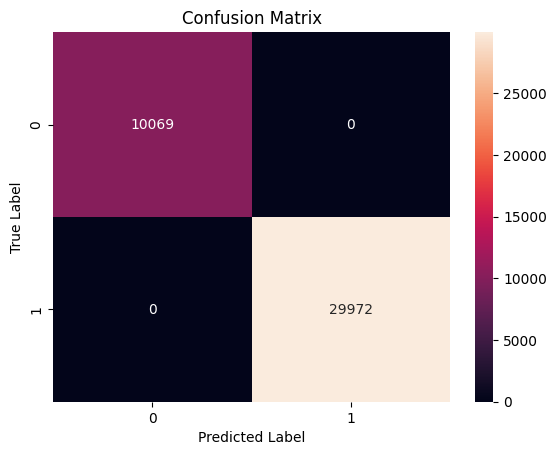

In [18]:
# Linear

import seaborn as sns
import matplotlib.pyplot as plt

labels=["0","1"]
sns.heatmap(cm,annot=True,fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()   

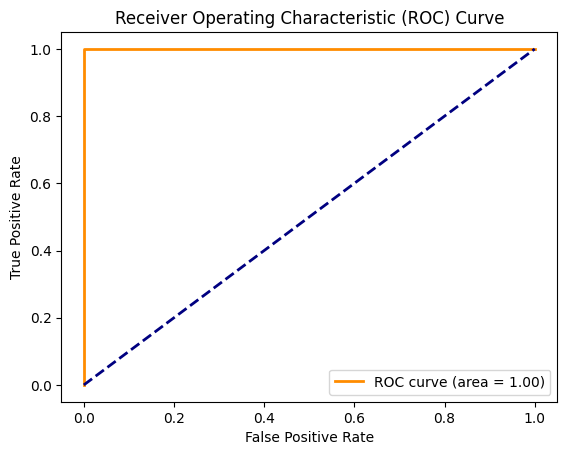

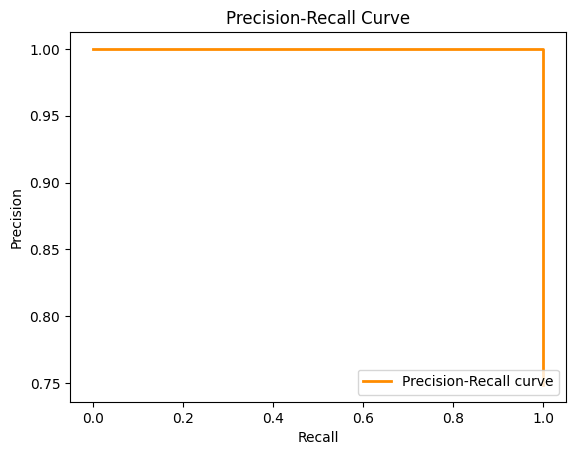

Matthews Correlation Coefficient: 1.0


In [19]:
# Linear binary class [0,1]


from sklearn.metrics import roc_curve,auc,precision_recall_curve,matthews_corrcoef
import matplotlib.pyplot as plt

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# p-r curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)

In [22]:
# rbf

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X=x
y=df.iloc[:,len(df.columns)-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

svm=SVC(kernel='rbf',C=1.0,random_state=42)

svm.fit(X_train,y_train)

y_pred=svm.predict(X_test)


In [ ]:
# rbf

from sklearn.metrics import accuracy_pred,classification_report,confusion_matrix,hinge_loss
accuracy=accuracy_pred(y_test,y_pred)
print("Accuracy:",accuracy)
loss=hinge_loss(y_test,y_pred)
print("Hinge Loss:",loss)
print("\nClassification Report:\n",classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:\n",cm)




Accuracy: 0.940186309033241
Hinge Loss: 0.31128093703953447

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89     10069
           1       1.00      0.92      0.96     29972

    accuracy                           0.94     40041
   macro avg       0.90      0.96      0.93     40041
weighted avg       0.95      0.94      0.94     40041


Confusion Matrix:
 [[10069     0]
 [ 2395 27577]]


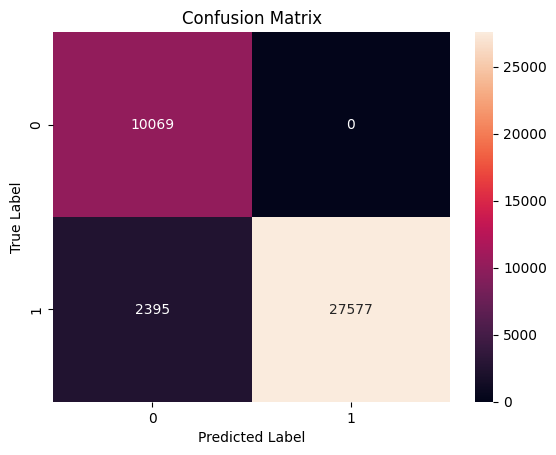

In [ ]:
# rbf

import seaborn as sns
import matplotlib.pyplot as plt

labels=["0","1"]
sns.heatmap(cm,annot=True,fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()   

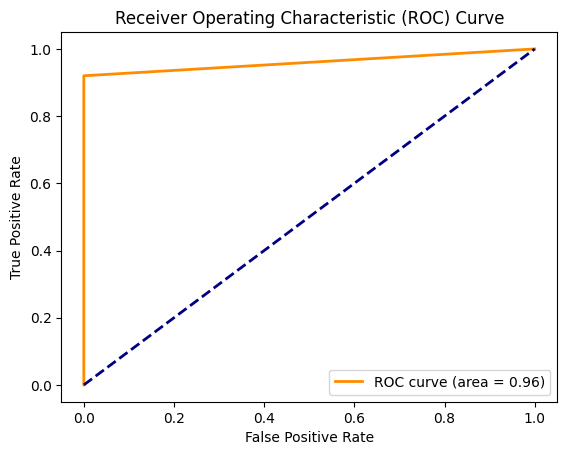

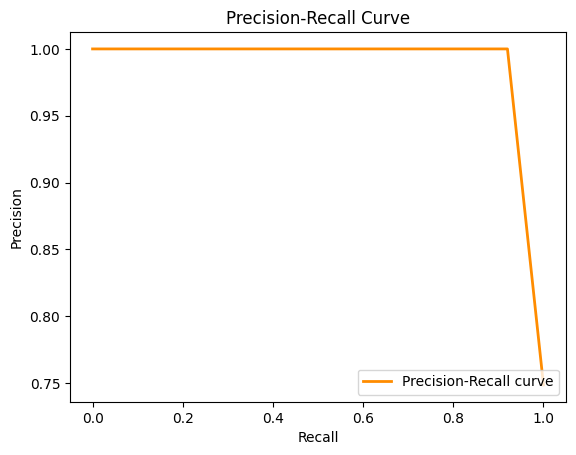

Matthews Correlation Coefficient: 0.8621445712092204


In [ ]:
# rbf

from sklearn.metrics import roc_curve,auc,precision_recall_curve,matthews_corrcoef
import matplotlib.pyplot as plt

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# p-r curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)